# Capítulo 12: Manipulando átomos e moléculas com a biblioteca ASE

Esse Jupyter Notebook contém todos os códigos aplicados no capítulo 12 - Manipulando átomos e moléculas com a biblioteca ASE.

Autores: Gerd Bruno da Rocha e Rodrigo Queiroz de Albuquerque

e-mail: gbr@academico.ufpb.br

Laboratório de Química Quântica Computacional

Departamento de Química 

Universidade Federal da Paraíba

www.quantum-chem.pro.br

Fontes de consulta:

1. Aprendendo Química com Python, Rodrigo Queiroz e Gerd Rocha, 2021, Amazon Book. 
2. Físico Química, Atkins, P., vol.1, 10a ed., LTC, 2010.
3. xxxxxxxxxxxxxx


## Versão do Python usada

In [1]:
import sys
print(sys.version)

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


## Leis de velocidade integradas

### Caixa de sessão interativa 55: Leis integradas de velocidade com SymPy

In [2]:
from sympy import *
A = Symbol('[A]')         # concentração (final) da espécie A
order = 1  # ordem da reação
integral = integrate(1/(A**order), A) # ordem 1
print(integral) # Abaixo "log()" (abaixo) é na verdade "ln()"

log([A])


In [3]:
integral = integrate(1/(A**order), (A, 0.8, 0.4))
print(integral)

-0.693147180559945


In [4]:
A0 = Symbol('[A]0')       # concentração inicial da espécie A
integral = integrate(1/(A**order), (A, A0, A))
print(integral)

log([A]) - log([A]0)


In [5]:
orders = [0, 0.5, 1, 2]
for order in orders:
    integral = integrate(1/(A**order), (A, A0, A))
    print(f'Lei integrada (ordem {order}): {integral} = -kt')

Lei integrada (ordem 0): [A] - [A]0 = -kt
Lei integrada (ordem 0.5): 2.0*[A]**0.5 - 2.0*[A]0**0.5 = -kt
Lei integrada (ordem 1): log([A]) - log([A]0) = -kt
Lei integrada (ordem 2): 1/[A]0 - 1/[A] = -kt


### Caixa de código 44: Determinando ordens de reação graﬁcamente

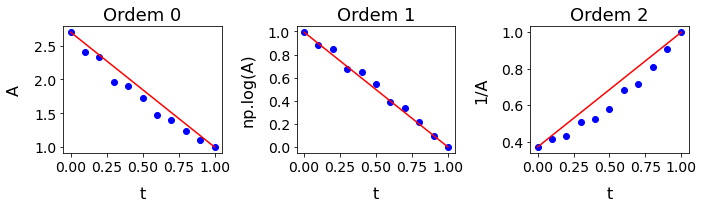

In [6]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([2.7, 2.41, 2.33, 1.96, 1.91, 1.72, 1.47, 1.4, 1.24, 1.1, 1])
t = np.arange(0, 1.1, 0.1)   # t = [0, 0.1, 0.2, ..., 1.0]
y = ['A', 'np.log(A)', '1/A']
plt.figure(figsize = (10,3))
for i, expr in enumerate(y):
    Y = eval(expr)
    plt.subplot(1, 3, i+1)
    plt.plot(t, Y, 'bo')      # pontos azuis
    delta_t, delta_Y = [t[0],t[-1]] , [Y[0],Y[-1]]
    plt.plot(delta_t, delta_Y, '-r')  # reta vermelha
    plt.xlabel('t', fontsize = 16, labelpad = 12)
    plt.ylabel(expr, fontsize = 16, labelpad = 12)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.title(f'Ordem {i}', fontsize = 18)
plt.tight_layout()
plt.savefig('cinetica2.png', dpi = 400)

### Caixa de sessão interativa 56: Determinando ordens de reação e parâmetros cinéticos

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
A = np.array([2.7, 2.41, 2.33, 1.96, 1.91, 1.72, 1.47, 1.4, 1.24, 1.1, 1])
y = ['A', 'np.log(A)', '1/A']
t = np.arange(0, 1.1, 0.1).reshape(-1,1)
for i, expr in enumerate(y):
    Y = eval(expr)
    model_ls = LinearRegression()      # objeto para regressão
    model_ls.fit(t, Y)                      # regressão linear
    pred = model_ls.predict(t)                 # previsão de Y
    r2 = round(r2_score(Y, pred), 3)          # R2 da previsão
    ema = round(mean_absolute_error(Y, pred), 3)        # erro 
    ca = round(model_ls.coef_[0], 2)     # coeficiente angular
    cl = round(model_ls.intercept_, 2)    # coeficiente linear
    print(f'Ordem {i}: R2 = {r2}, EMA = {ema}, CL = {cl}, CA = {ca}')

Ordem 0: R2 = 0.982, EMA = 0.055, CL = 2.59, CA = -1.69
Ordem 1: R2 = 0.993, EMA = 0.025, CL = 1.01, CA = -0.99
Ordem 2: R2 = 0.967, EMA = 0.032, CL = 0.32, CA = 0.62


## Curvas de decaimento e tempos de meia vida

### Caixa de sessão interativa 57: Determinando curvas de decaimento

In [12]:
from sympy import *
A, A0, k, t = symbols('[A] [A]0 k t')

In [13]:
print(solve(log(A) - log(A0) + k*t, A)) # lei integr. ordem 1

[[A]0*exp(-k*t)]


In [14]:
print(solve(1/A0 - 1/A + k*t, A))    # lei integrada, ordem 2

[[A]0/([A]0*k*t + 1)]


### Caixa de código 45: Plotando curvas de decaimento

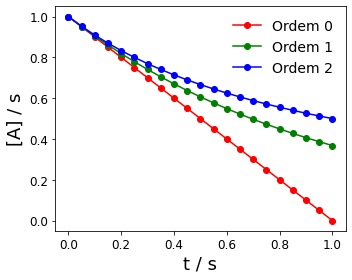

In [15]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0, 1.05, 0.05)    # t = [0, 0.05, 0.1, ... , 1]
A0, k = 1, 1
A_ord0 = A0 - k*t
A_ord1 = A0*np.exp(-k*t)
A_ord2 = A0 / (A0*k*t + 1)
plt.figure(figsize = (5, 4))
plt.plot(t, A_ord0, '-ro', label = 'Ordem 0')
plt.plot(t, A_ord1, '-go', label = 'Ordem 1')
plt.plot(t, A_ord2, '-bo', label = 'Ordem 2')
plt.xlabel('t / s', fontsize = 18)
plt.ylabel('[A] / s', fontsize = 18)
plt.legend(frameon = False, fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig('cinetica5.png', dpi = 400)

### Caixa de sessão interativa 58: Derivando tempos de meia vida

In [16]:
from sympy import *
A, A0, k, t = symbols('[A] [A]0 k t')

In [17]:
print(solve(A0/2 - A0 + k*t, t)) # ordem 0

[[A]0/(2*k)]


In [18]:
print(solve(A0/2 - A0*exp(-k*t), t)) # ordem 1

[log(2)/k]


In [19]:
print(solve(A0/2 - A0 / (A0*k*t + 1), t)) # ordem 2

[1/([A]0*k)]


### Caixa de código 46: Visualizando tendências dos tempos de meia vida

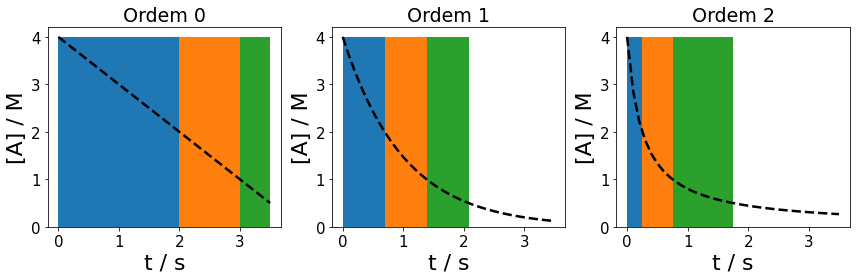

In [20]:
import numpy as np
import matplotlib.pyplot as plt
A0, k, delta = 4, 1, 0.1               # [A]0, k, intervalos de t
t = np.arange(0, 3.5 + delta, delta)               # valores de t
A_ord0 = A0 - k * t                     # decaimento para ordem 0
A_ord1 = A0 * np.exp(- k * t)           # decaimento para ordem 1
A_ord2 = A0 / (A0 * k * t + 1)          # decaimento para ordem 2
concs = [A_ord0, A_ord1, A_ord2]  # [A] previsto
t12_0 = [A_ord0[0]/2, A_ord0[0]/4, A_ord0[0]/8]  # t1/2 (ordem 0)
t12_1 = [np.log(2), np.log(2), np.log(2)]        # t1/2 (ordem 1)
t12_2 = [1/A_ord2[0], 1/(A_ord2[0]/2), 1/(A_ord2[0]/4)] # t1/2(2)
t12 = [t12_0, t12_1, t12_2]        # todos os tempos de meia vida
plt.figure(figsize = (12, 4))
for i, conc in enumerate(concs):
    plt.subplot(1, 3, i+1)           # inicie o sub-gráfico "i+1"
    plt.plot(t, conc, '--k', lw = 2.5)  # plote a linha tracejada
    plt.title(f'Ordem {i}', fontsize = 19)
    x1, w1 = t12[i][0]/2, t12[i][0] # posição, largura da barra 1
    x2, w2 = t12[i][0] + t12[i][1]/2, t12[i][1] # barra 2
    x3, w3 = t12[i][0] + t12[i][1] + t12[i][2]/2, t12[i][2] # b 3
    plt.bar(x1, A0, width = w1)
    plt.bar(x2, A0, width = w2)
    plt.bar(x3, A0, width = w3)
    plt.xlabel('t / s', fontsize = 22)
    plt.ylabel('[A] / M', fontsize = 22)    
    plt.xticks([0,1,2,3], fontsize = 15)
    plt.yticks([0,1,2,3,4], fontsize = 15)
plt.tight_layout()
plt.savefig('cinetica7.png', dpi = 400)

# Fim